In [3]:
import pandas as pd 
import matplotlib.pyplot as plt 

In [4]:
df = pd.read_csv(r'D:\nam_3\data_mining\BTL\car_sales_data.csv')
df

,Date,Salesperson,Customer Name,Car Make,Car Model,Car Year,Sale Price,Commission Rate,Commission Earned
0,2022-08-01,Monica Moore MD,Mary Butler,Nissan,Altima,2018,15983,0.070495,1126.73
1,2023-03-15,Roberto Rose,Richard Pierce,Nissan,F-150,2016,38474,0.134439,5172.40
2,2023-04-29,Ashley Ramos,Sandra Moore,Ford,Civic,2016,33340,0.114536,3818.63
3,2022-09-04,Patrick Harris,Johnny Scott,Ford,Altima,2013,41937,0.092191,3866.20
4,2022-06-16,Eric Lopez,Vanessa Jones,Honda,Silverado,2022,20256,0.113490,2298.85
...,...,...,...,...,...,...,...,...,...
2499995,2022-05-26,Isabella Moore,Shirley Lee,Chevrolet,Silverado,2021,49823,0.062977,3137.70
2499996,2022-10-03,Kimberly Snow,Tara Rodgers,Ford,F-150,2022,18803,0.068339,1284.97
2499997,2022-06-07,Jessica Young,Jennifer Moore,Chevrolet,Civic,2010,30863,0.088915,2744.19
2499998,2023-02-15,Donald Barber,Ashley Diaz,Honda,Silverado,2014,26125,0.088260,2305.80


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2500000 entries, 0 to 2499999
Data columns (total 9 columns):
 #   Column             Dtype  
---  ------             -----  
 0   Date               object 
 1   Salesperson        object 
 2   Customer Name      object 
 3   Car Make           object 
 4   Car Model          object 
 5   Car Year           int64  
 6   Sale Price         int64  
 7   Commission Rate    float64
 8   Commission Earned  float64
dtypes: float64(2), int64(2), object(5)
memory usage: 171.7+ MB


In [6]:
#   kiểm tra dataframe có hàng nào trùng không
df.duplicated().sum()

0

In [7]:
#   xóa các hàng bị trùng
df = df.drop_duplicates()

In [23]:
#   check date xem có hợp lệ không
pd.to_datetime(df['Date']).sort_values()

550551    2022-05-01
1875673   2022-05-01
183953    2022-05-01
1038507   2022-05-01
1774105   2022-05-01
             ...    
824103    2023-05-01
1880469   2023-05-01
909831    2023-05-01
1384426   2023-05-01
213312    2023-05-01
Name: Date, Length: 2500000, dtype: datetime64[ns]

In [8]:
# tách 'Date' ra thành Year, Month, Day
df['Date'] = pd.to_datetime(df['Date'])
df['Year'] = df.Date.dt.year
df['Month'] = df.Date.dt.month
df.head()

,Date,Salesperson,Customer Name,Car Make,Car Model,Car Year,Sale Price,Commission Rate,Commission Earned,Year,Month
0,2022-08-01,Monica Moore MD,Mary Butler,Nissan,Altima,2018,15983,0.070495,1126.73,2022,8
1,2023-03-15,Roberto Rose,Richard Pierce,Nissan,F-150,2016,38474,0.134439,5172.40,2023,3
2,2023-04-29,Ashley Ramos,Sandra Moore,Ford,Civic,2016,33340,0.114536,3818.63,2023,4
3,2022-09-04,Patrick Harris,Johnny Scott,Ford,Altima,2013,41937,0.092191,3866.20,2022,9
4,2022-06-16,Eric Lopez,Vanessa Jones,Honda,Silverado,2022,20256,0.113490,2298.85,2022,6


In [22]:
df['Month'].sort_values()

1626552     1
233422      1
2353814     1
1637183     1
2051058     1
           ..
2324852    12
1688578    12
1688577    12
1293171    12
936965     12
Name: Month, Length: 2500000, dtype: int32

In [9]:
#   check NAN value
df.isnull().sum()

Date                 0
Salesperson          0
Customer Name        0
Car Make             0
Car Model            0
Car Year             0
Sale Price           0
Commission Rate      0
Commission Earned    0
Year                 0
Month                0
dtype: int64

In [10]:
df.describe()

,Date,Car Year,Sale Price,Commission Rate,Commission Earned,Year,Month
count,2500000,2.500000e+06,2.500000e+06,2.500000e+06,2.500000e+06,2.500000e+06,2.500000e+06
mean,2022-10-30 10:01:32.632321024,2.015996e+03,3.001218e+04,9.998766e-02,3.001005e+03,2.022330e+03,6.523978e+00
min,2022-05-01 00:00:00,2.010000e+03,1.000000e+04,5.000014e-02,5.013400e+02,2.022000e+03,1.000000e+00
25%,2022-07-31 00:00:00,2.013000e+03,2.001900e+04,7.496450e-02,1.821710e+03,2.022000e+03,4.000000e+00
50%,2022-10-30 00:00:00,2.016000e+03,3.000600e+04,1.000058e-01,2.741910e+03,2.022000e+03,7.000000e+00
75%,2023-01-30 00:00:00,2.019000e+03,4.002200e+04,1.250065e-01,3.978142e+03,2.023000e+03,1.000000e+01
max,2023-05-01 00:00:00,2.022000e+03,5.000000e+04,1.500000e-01,7.494530e+03,2.023000e+03,1.200000e+01
std,NaN,3.739132e+00,1.154514e+04,2.887202e-02,1.481467e+03,4.702848e-01,3.444897e+00


In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2500000 entries, 0 to 2499999
Data columns (total 11 columns):
 #   Column             Dtype         
---  ------             -----         
 0   Date               datetime64[ns]
 1   Salesperson        object        
 2   Customer Name      object        
 3   Car Make           object        
 4   Car Model          object        
 5   Car Year           int64         
 6   Sale Price         int64         
 7   Commission Rate    float64       
 8   Commission Earned  float64       
 9   Year               int32         
 10  Month              int32         
dtypes: datetime64[ns](1), float64(2), int32(2), int64(2), object(4)
memory usage: 190.7+ MB


In [12]:
#   tính trung bình giá bán của mỗi loại xe
avg_sale_price = df.groupby('Car Make')['Sale Price'].mean().sort_values()
avg_sale_price

#   Honda có giá bán trung bình cao nhất
#   Ford có giá bán trung bình thấp nhất
#   => giá trị sản xuất cao nên giá bán cao

Car Make
Ford         29994.461240
Toyota       30001.989895
Chevrolet    30015.431557
Nissan       30016.451923
Honda        30032.532548
Name: Sale Price, dtype: float64

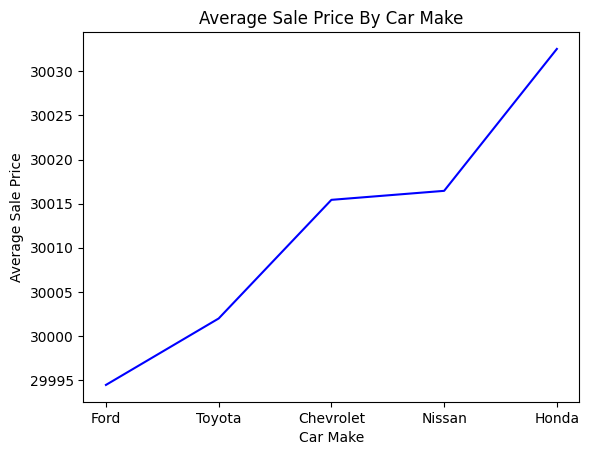

In [13]:
#   trừu tượng hóa nó ra
higher_price_make = avg_sale_price.idxmax()

plt.plot(avg_sale_price, 'b-', label='Average Sale Price')
plt.xlabel('Car Make')
plt.ylabel('Average Sale Price')
plt.title('Average Sale Price By Car Make')
plt.show()

In [14]:
print(f'The higher price of car make is {higher_price_make}')

The higher price of car make is Honda


In [15]:
#   tính tiền hoa hồng kiếm được từ mỗi tên khách hàng
commission_earned = df.groupby('Customer Name')['Commission Earned'].sum().sort_values()
commission_earned

#   khách hàng mua nhiều nhất là Michael Smith đã mua 3463226.21
#   khách hàng mua nhiều nhất là Kimberly Figueroa DVM đã mua 3463226.21

Customer Name
Kimberly Figueroa DVM        503.12
Jenny Ferrell                505.39
Chloe Hickman                506.46
Ariel Cline                  508.26
Tracy Murillo                508.65
                            ...    
Michael Williams         2380376.66
David Smith              2388019.37
James Smith              2405014.38
Michael Johnson          2598959.83
Michael Smith            3463226.21
Name: Commission Earned, Length: 518251, dtype: float64

In [16]:
#   tìm 5 khoảng hoa hồng kiếm được lớn nhất từ 5 khách hàng có mức hoa hồng cao nhất
top_five_commission_earned = commission_earned.tail(5)
top_five_commission_earned

Customer Name
Michael Williams    2380376.66
David Smith         2388019.37
James Smith         2405014.38
Michael Johnson     2598959.83
Michael Smith       3463226.21
Name: Commission Earned, dtype: float64

In [17]:
#   tìm 5 khoảng hoa hồng thấp nhất
worst_file_commission_earned = commission_earned.head(5)
worst_file_commission_earned

Customer Name
Kimberly Figueroa DVM    503.12
Jenny Ferrell            505.39
Chloe Hickman            506.46
Ariel Cline              508.26
Tracy Murillo            508.65
Name: Commission Earned, dtype: float64

In [18]:
#   trừu tượng hóa nó lên
import seaborn as sns


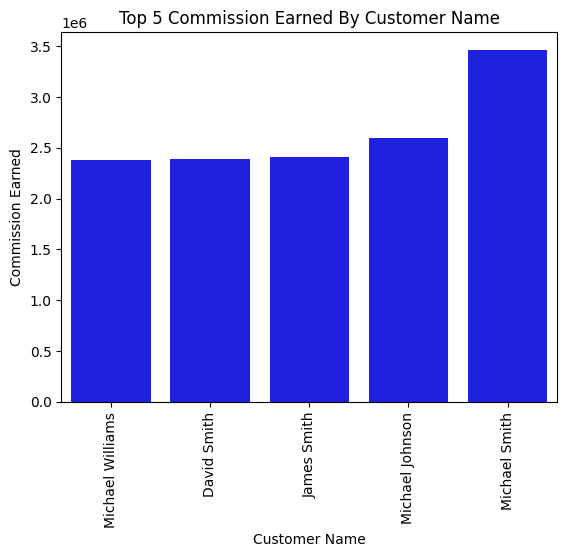

In [19]:
sns.barplot(x=top_five_commission_earned.index, y=top_five_commission_earned.values, color='Blue')
plt.xlabel('Customer Name')
plt.ylabel('Commission Earned')
plt.title('Top 5 Commission Earned By Customer Name')
plt.xticks(rotation=90)
plt.show()

In [20]:
#   5 tháng có doanh số bán hàng tốt nhất là
#   nhóm dataframe lại theo tháng và tính giá bán trung bình
df_sale_month = df.groupby('Month')['Sale Price'].mean().sort_values(ascending=False)
#   5 tháng bán chạy nhất
df_sale_month.head()

Month
8     30052.312136
4     30046.320463
12    30044.549012
7     30026.342485
2     30022.099481
Name: Sale Price, dtype: float64